In [2]:
!pip3 install sympy scipy fipy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 14.9 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for fipy from https://files.pythonhosted.org/packages/3c/90/35015c5e45573144c8c05fc4ce559316205b128eb32fa8126f16f6deb6ea/FiPy-3.4.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 18.2 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 kB 14.8 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492024 sha256=076ec222b6119a25223c74cef2a45297bb4514213e6e3fd4fd914fb742048ac5
  Stored in directory: /Users/evgenijkondratev/Library/Caches/pip/wheels/f1/54/27/4e5cb4bd05116c097877e85a206a2e08d301aaa9b7af719909
Successfully built future

[notice] A new release 

Решение обычного ДУ

In [78]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

equation = sp.Eq(y(t).diff(t), -2 * y(t))

solution = sp.dsolve(equation)
print(solution.rhs)

C1*exp(-2*t)


Решение ДУ 2-го порядка.

`diff(t, t)` - взятие производной 2-го порядка

In [7]:
t = sp.symbols('t')
y = sp.Function('y')

equation = sp.Eq(y(t).diff(t, t) - 2 * y(t), 0)
solution = sp.dsolve(equation)
print(solution)

Eq(y(t), C1*exp(-sqrt(2)*t) + C2*exp(sqrt(2)*t))


### Метод Эйлера

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_solution(ax, x, exact_sol, sol_x, sol_y, xlabel="$t$"):
    ax.plot(x, exact_sol(x), color="green", label="Точное решение")
    ax.scatter(sol_x, sol_y, color="red", marker=".", label="Приближенное решение")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("$y$")
    ax.legend()

``y'(x) = x^2 - 2y = f(x, y)``

In [154]:
y0 = 1
step = 0.1
x = np.linspace(0, 1, int(1 / step))

In [155]:
def f(x, y):
    return x ** 2 - 2 * y

In [156]:
y = np.zeros((len(x), 1))
y[0] = y0
for i in range(1, len(x)):
    y[i] = y[i - 1] + step * f(x[i - 1], y[i - 1])

In [157]:
x_ = sp.symbols('x')
g = sp.Function('g')

equation = sp.Eq(g(x_).diff(x_), x_ ** 2 - 2 * g(x_))
solution = sp.dsolve(equation, ics={g(0) : 1}).rhs
print(solution)

x**2/2 - x/2 + 1/4 + 3*exp(-2*x)/4


In [158]:
from math import exp

def g_function(x):
    return x**2/2 - x/2 + 1/4 + 3*exp(-2*x)/4
    
g_values = [0] * x.shape[0]
for i in range(len(g_values)):
    g_values[i] = g_function(x[i])

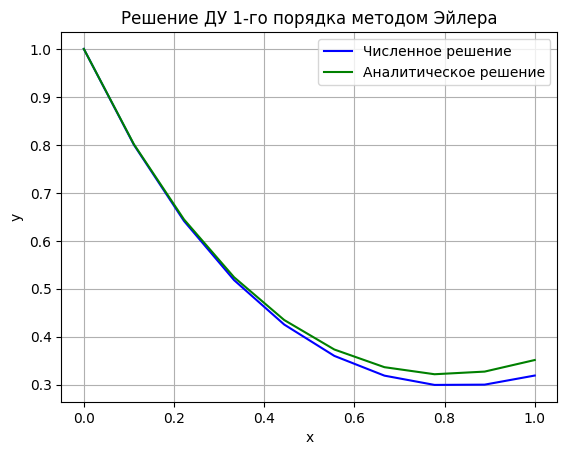

In [159]:
plt.plot(x, y, 'b', x, g_values, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['Численное решение', 'Аналитическое решение'])
plt.title('Решение ДУ 1-го порядка методом Эйлера')
plt.show()

### Метод Рунге-Кутты 4-го порядка

In [169]:
y0 = 1
step = 0.01
x = np.linspace(0, 1, int(1 / step))

In [170]:
y = np.zeros((len(x), 1))
y[0] = y0
for i in range(1, len(x)):
    k1 = f(x[i - 1], y[i - 1])
    k2 = f(x[i - 1] + step / 2, y[i - 1] + step * k1 / 2)
    k3 = f(x[i - 1] + step / 2, y[i - 1] + step * k2 / 2)
    k4 = f(x[i - 1] + step, y[i - 1] + step * k3)
    y[i] = y[i - 1] + step / 6 * (k1 + 2 * k2 + 2 * k3 + k4)

In [171]:
from math import exp

def g_function(x):
    return x**2/2 - x/2 + 1/4 + 3*exp(-2*x)/4
    
g_values = [0] * x.shape[0]
for i in range(len(g_values)):
    g_values[i] = g_function(x[i])

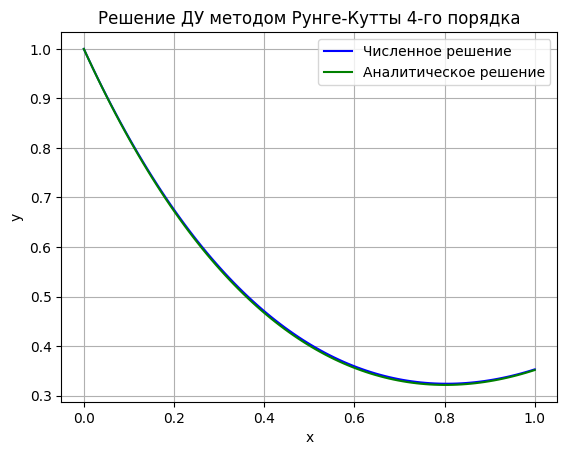

In [172]:
plt.plot(x, y, 'b', x, g_values, 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['Численное решение', 'Аналитическое решение'])
plt.title('Решение ДУ методом Рунге-Кутты 4-го порядка')
plt.show()

# Решение ДУ методами ``scipy``

## Решение ДУ 1-го порядка

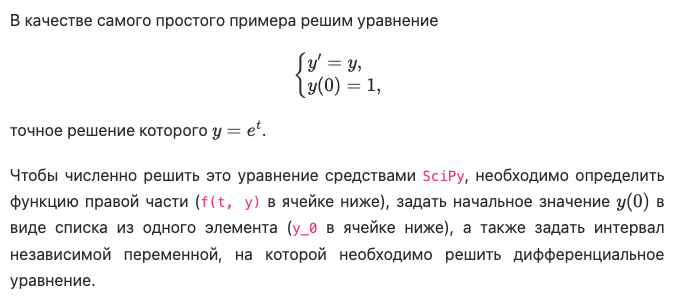

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def plot_solution(ax, x, exact_sol, sol_x, sol_y, xlabel="$t$"):
    ax.plot(x, exact_sol(x), color="green", label="Точное решение")
    ax.scatter(sol_x, sol_y, color="red", marker=".", label="Приближенное решение")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("$y$")
    ax.legend()

In [8]:
def f(t, y):
    return y

def exact_solution(t):
    return np.exp(t)

y_0 = [1]
t_0 = 0
t_final = 3
solution = integrate.solve_ivp(f, (t_0, t_final), y_0, t_eval=np.linspace(t_0, t_final, 20))
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.579e-01 ...  2.842e+00  3.000e+00]
        y: [[ 1.000e+00  1.171e+00 ...  1.715e+01  2.009e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 26
     njev: 0
      nlu: 0


Для данного уравнения функция ``scipy.integrate.solve_ivp`` выдала решение, содержащее совсем небольшое количество точек, так как метод быстро сошелся. Параметром ``t_eval`` можно в явно виде задать сетку, в узлах которой требуется получить оценку точного решения.

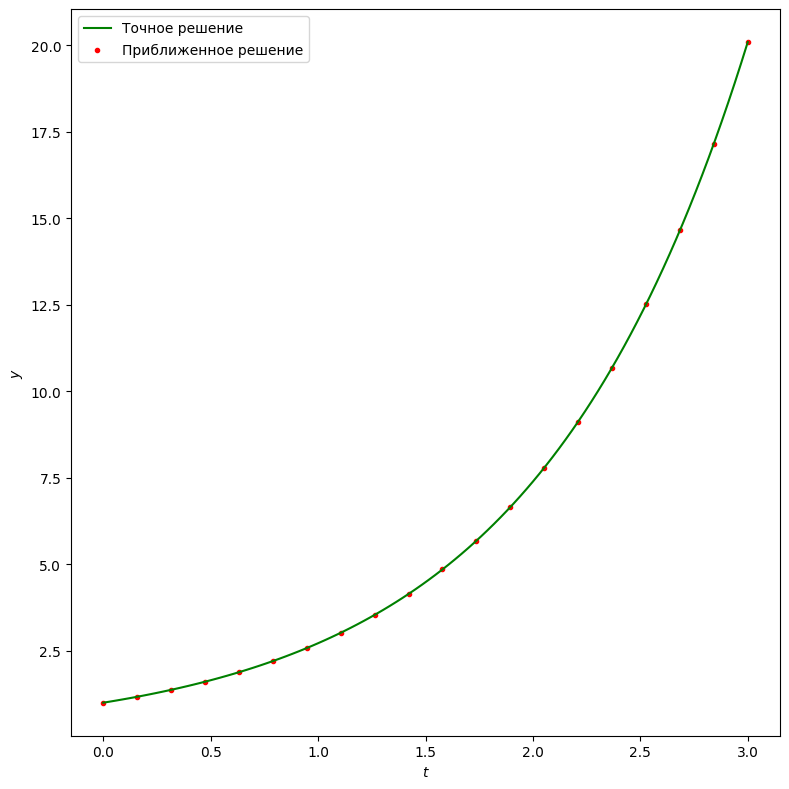

In [9]:
fig, ax = plt.subplots(figsize=(8, 8), layout='tight')
x = np.linspace(t_0, t_final, 100)
plot_solution(ax, x, exact_solution, solution.t, solution.y[0])

## Уравнения высшего порядка

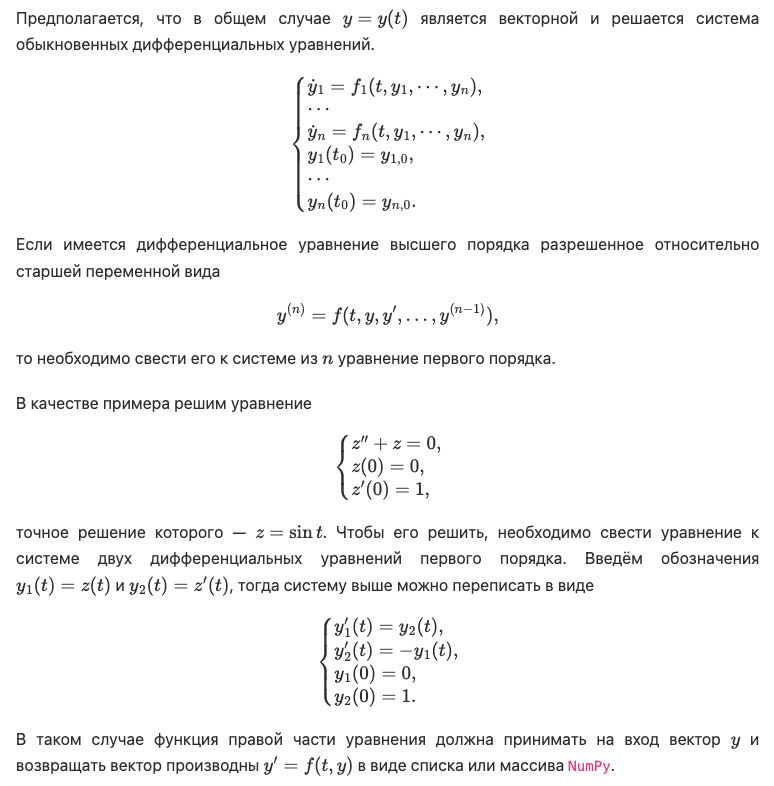

In [10]:
def exact_solution(t):
    return np.sin(t)

def f(t, y):
    return [
        y[1],
        -y[0]
        ]

y_0 = [0, 1]
t_0 = 0
t_final = np.pi
t_eval = np.linspace(0, np.pi, 10)

solution = integrate.solve_ivp(f, (t_0, t_final), y_0, t_eval=t_eval)
print(solution)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.491e-01  6.981e-01  1.047e+00  1.396e+00
             1.745e+00  2.094e+00  2.443e+00  2.793e+00  3.142e+00]
        y: [[ 0.000e+00  3.421e-01 ...  3.415e-01 -5.877e-04]
            [ 1.000e+00  9.397e-01 ... -9.399e-01 -1.000e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 44
     njev: 0
      nlu: 0


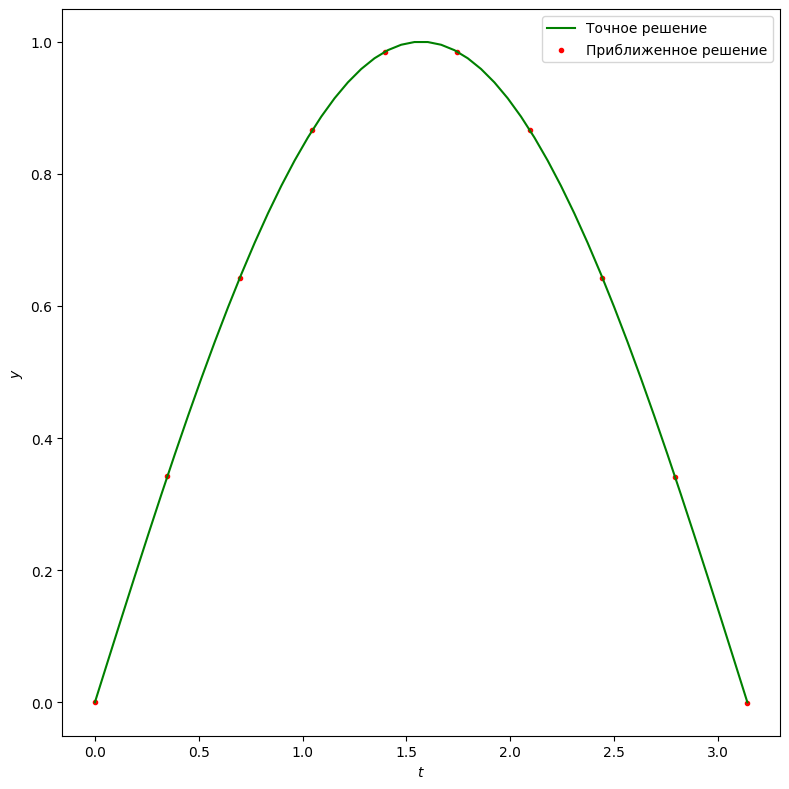

In [12]:
x = np.linspace(0, np.pi, 50)
fig, ax = plt.subplots(figsize=(8, 8), layout='tight')
plot_solution(ax, x, exact_solution, solution.t, solution.y[0])

## Выбор метода решения

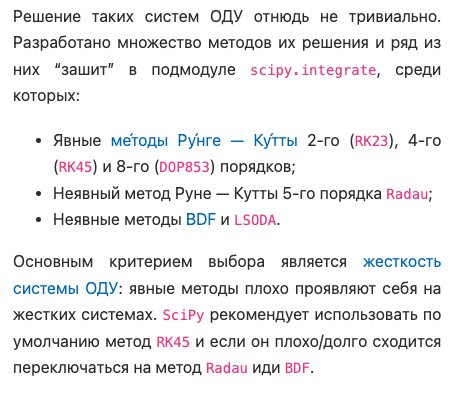

## Решение методом ``scipy.integrate.RK45()``

In [62]:
def exact_solution(t):
    return np.sin(t)

def f(t, y):
    return [
        y[1],
        -y[0]
        ]

y_0 = [0, 1]
t_0 = 0.0
t_final = np.pi
t_eval = np.linspace(0, np.pi, 10)

integrator = integrate.RK45(f, t_0, y_0, rtol=0.001, atol=10**-6, t_bound=t_final, max_step = 0.1)
y_sol = []
t_sol = []
while not(integrator.status == 'finished'):
    integrator.step()
    t_sol.append(integrator.t)
    y_sol.append(integrator.y[0])

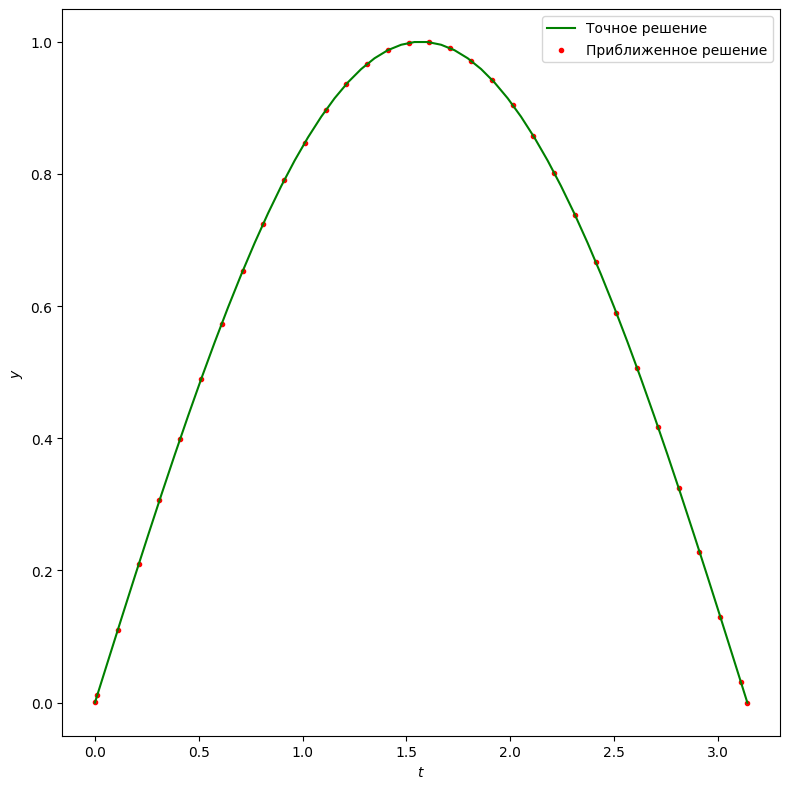

In [63]:
x = np.linspace(0, np.pi, 50)
fig, ax = plt.subplots(figsize=(8, 8), layout='tight')
plot_solution(ax, x, exact_solution, t_sol, y_sol)

## Гармонический осциллятор

In [78]:
def plot_solution(ax, sol_x, sol_y, xlabel="$t$"):
    ax.plot(sol_x, sol_y, color="black", label="Приближенное решение")
    ax.set_xlabel(xlabel)
    ax.set_ylabel("$y(t)$")
    ax.legend()

In [92]:
def f(t, y, params=()):
    return [
        y[1],
        -1/2 * (1 * y[1] + 10 * y[0])
        ]

y_0 = [0, 1]
t_0 = 0.0
t_final = np.pi * 5

integrator = integrate.RK45(f, t_0, y_0, rtol=0.001, atol=10**-6, t_bound=t_final, max_step = 0.05)
y_sol = []
t_sol = []
while not(integrator.status == 'finished'):
    integrator.step()
    t_sol.append(integrator.t)
    y_sol.append(integrator.y[0])

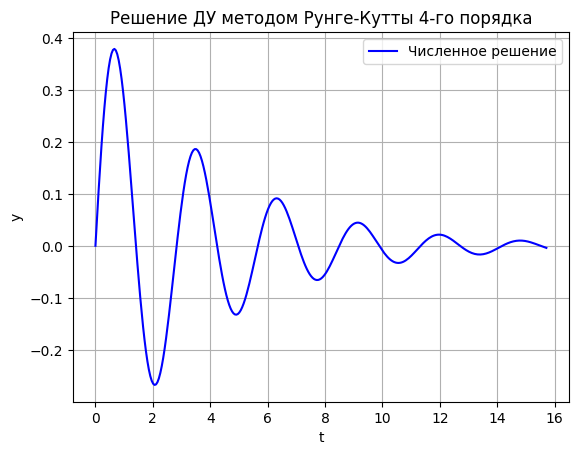

In [94]:
plt.plot(t_sol, y_sol, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.legend(['Численное решение'])
plt.title('Решение ДУ методом Рунге-Кутты 4-го порядка')
plt.show()

## Система с 2-мя степенями свободы под параметрическим воздействием

In [159]:
def f(t, y):
    return [
        y[1],
        -20/3 * y[0] + 10/3 * (y[2] - y[0]) - 2.5/3 * y[1] + 2.5/3 * (y[3] - y[2]),
        y[3],
        -10/5 * (y[2] - y[0]) - 2.5/5 * (y[3] - y[1]) + 1000/5 * np.cos(11 * 2 * np.pi * t) + 0.3/5 * y[2] * np.cos(11 * 2 * np.pi * t)
        ]

y_0 = [0, 0, 0, 0]
t_0 = 0.0
t_final = 55

integrator = integrate.RK45(f, t_0, y_0, rtol=0.001, atol=10**-6, t_bound=t_final, max_step=0.5)
y1_sol = []
y2_sol = []
t_sol = []
while not(integrator.status == 'finished'):
    integrator.step()
    t_sol.append(integrator.t)
    y1_sol.append(integrator.y[0])
    y2_sol.append(integrator.y[2])


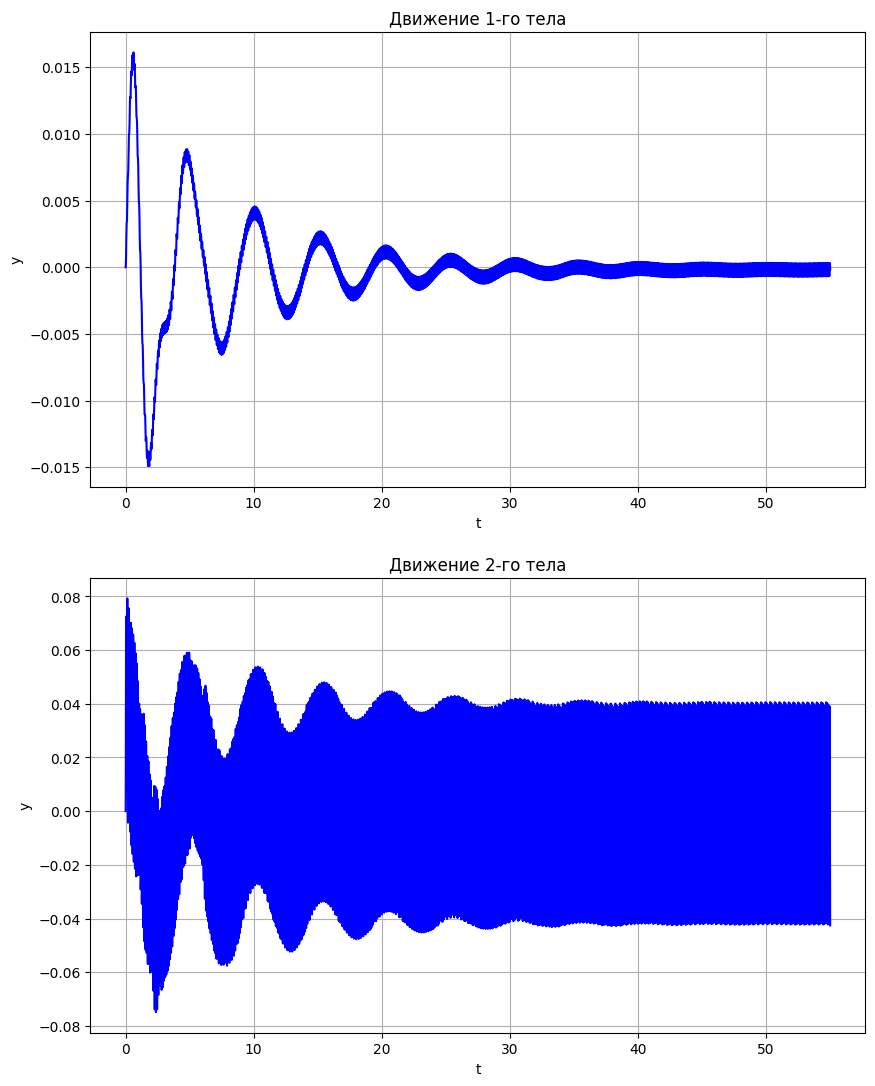

In [160]:
plt.rcParams["figure.figsize"] = (10,13)
plt.subplot(2, 1, 1)
plt.plot(t_sol, y1_sol, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.title('Движение 1-го тела')

plt.subplot(2, 1, 2)
plt.plot(t_sol, y2_sol, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

plt.title('Движение 2-го тела')
plt.show()

In [131]:
from scipy import signal

def lowpass(data, cutoff_freq, poles = 5):
    filter = signal.butter(poles, cutoff_freq, 'lowpass', output='sos')
    filtered_data = signal.sosfiltfilt(filter, data)
    return filtered_data

In [143]:
data = list(zip(t_sol, y1_sol))
filtered1_sol = lowpass(y1_sol, 0.1)
#times = np.arange(len(data))/sample_rate

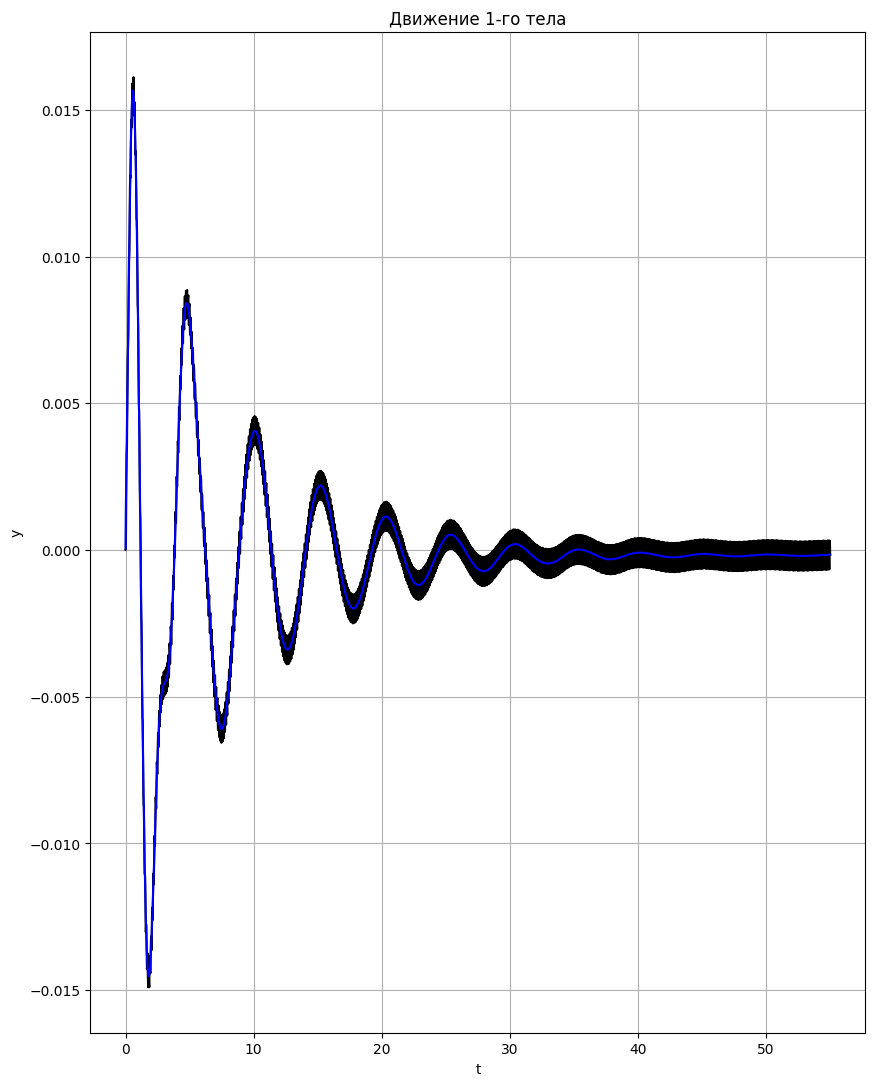

In [158]:
plt.rcParams["figure.figsize"] = (10,13)
plt.plot(t_sol, y1_sol, 'black', t_sol, filtered1_sol, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

plt.title('Движение 1-го тела')
plt.show()

In [149]:
data = list(zip(t_sol, y1_sol))
filtered2_sol = lowpass(y2_sol, 0.01)
#times = np.arange(len(data))/sample_rate

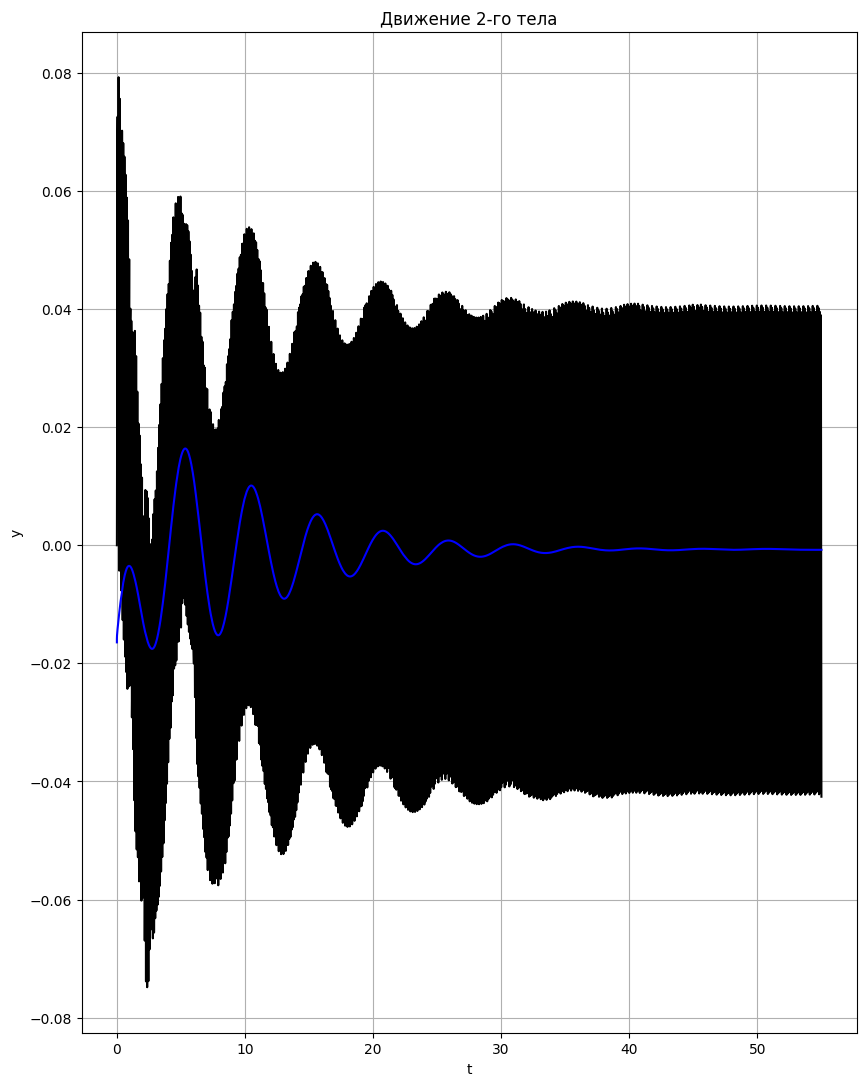

In [157]:
plt.plot(t_sol, y2_sol, 'black', t_sol, filtered2_sol, 'b')
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)

plt.title('Движение 2-го тела')
plt.show()

## Построение фазового портрета плоского движения по тангажу

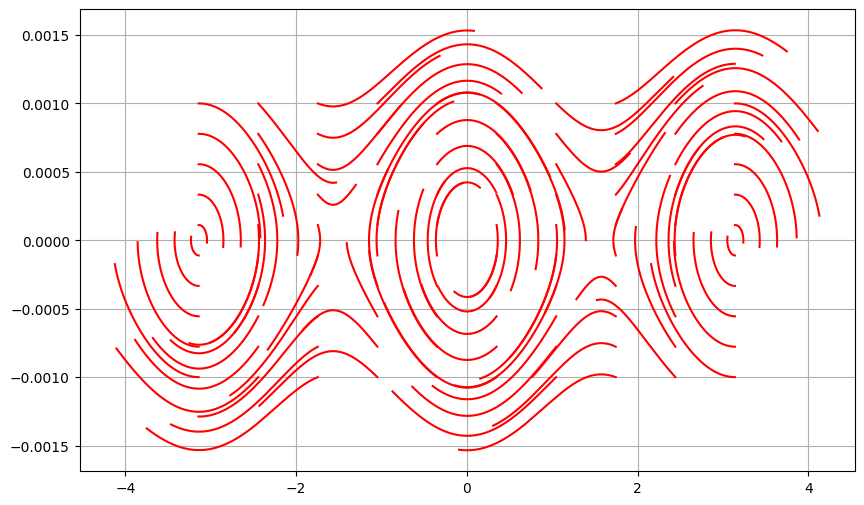

In [173]:
def f(t, y):
    return [
        y[1],
        -3/2*0.00101**2/285.14*(363.86-233.96)*np.sin(2*(y[0] - 0.004))/np.cos(2*0.004)
        ]

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(True)
for x0 in np.linspace(-np.pi, np.pi, 10):
    for y0 in np.linspace(-0.001, 0.001, 10):
        y_0 = [x0, y0]
        t_0 = 0
        t_final = 1500
        integrator = integrate.RK45(f, t_0, y_0, rtol=0.001, atol=10**-6, t_bound=t_final, max_step=0.5)
        y_sol = []
        v_sol = []
        t_sol = []
        while not(integrator.status == 'finished'):
            integrator.step()
            t_sol.append(integrator.t)
            y_sol.append(integrator.y[0])
            v_sol.append(integrator.y[1])
        plt.plot(y_sol, v_sol, 'r')
plt.show()

## Взаимосвязанное движение по крену и курсу

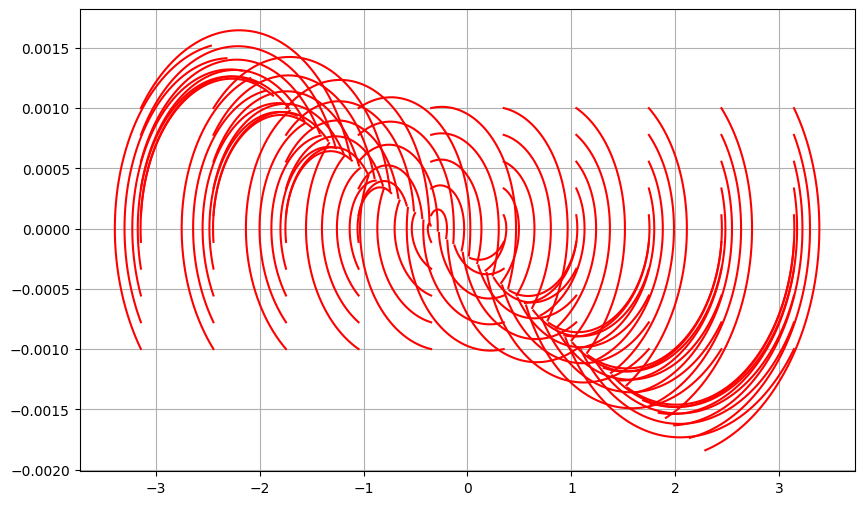

In [175]:
def f(t, y):
    return [
        y[1],
        0.00101/363.86*(285.14-363.86-233.96)*y[3]-4*0.00101**2/363.86*(285.14-233.96)*y[0],
        y[3],
        -0.00101/233.96*(285.14-363.86-233.96)*y[1]-0.00101**2/233.96*(285.14-363.86)*y[2]
        ]

plt.rcParams["figure.figsize"] = (10,6)
plt.grid(True)
for x0 in np.linspace(-np.pi, np.pi, 10):
    for y0 in np.linspace(-0.001, 0.001, 10):
        y_0 = [x0, y0, np.pi/5, 0]
        t_0 = 0
        t_final = 1500
        integrator = integrate.RK45(f, t_0, y_0, rtol=0.001, atol=10**-6, t_bound=t_final, max_step=0.5)
        gamma_sol = []
        gamma_v_sol = []
        psi_sol = []
        psi_v_sol = []
        t_sol = []
        while not(integrator.status == 'finished'):
            integrator.step()
            t_sol.append(integrator.t)
            gamma_sol.append(integrator.y[0])
            gamma_v_sol.append(integrator.y[1])
            psi_sol.append(integrator.y[2])
            psi_v_sol.append(integrator.y[3])
        plt.plot(gamma_sol, gamma_v_sol, 'r')
plt.show()